In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

from scipy.special import xlogy

In [2]:
def xlogx(x):
    return xlogy(x, x) / np.log(2)

In [3]:
df = pd.read_csv("fig2C--propensities.csv")

channel_length = df['channel_length'].unique()
assert len(channel_length) == 1
channel_length = channel_length[0]

In [4]:
def mi_per_pulse(p, p0 = 0.5):
    return -xlogx(p0) - xlogx(1 - p * p0) + xlogx((1 - p) * p0)
    # return -p0 * p * np.log2(p0) - (1 - p0 * p) * np.log2(1 - p0 * p) + (1 - p) * p0 * np.log2(1 - p)


df['MI'] = mi_per_pulse(np.exp(-df['l'] * channel_length)) # (1-df['l'])**channel_length)

In [5]:
def spawning_propensity(w):
    return (w - 1.07) / 53700

def failure_propensity(w):
    return .57 * 5.59**(-w)

def total_propensity(w):
    return spawning_propensity(w) + failure_propensity(w)

def passing_probability(length, width):
    return np.exp(-total_propensity(width) * length)

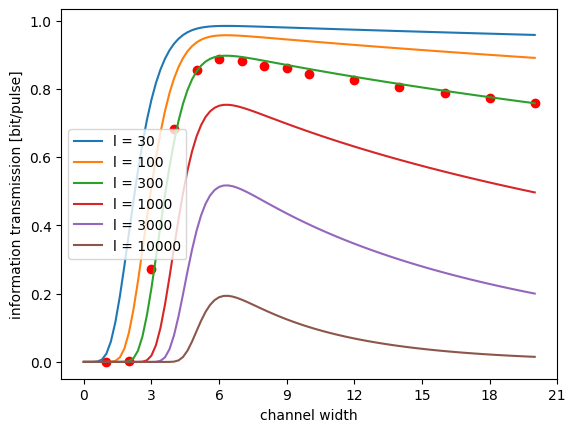

In [6]:
ax = plt.figure().gca()
# plt.plot(df['channel_width'], df['MI'])
plt.scatter(df['channel_width'], df['MI'], c='red')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('channel width')
plt.ylabel('information transmission [bit/pulse]')


ww = np.linspace(0,20,101)
for l in [30, 100, 300, 1000, 3000, 10000]:
    plt.plot(ww, mi_per_pulse(passing_probability(l, ww)), label=f"{l = }")
plt.legend()
# plt.savefig('MI.png')


Text(0, 0.5, 'transmitted information per pulse')

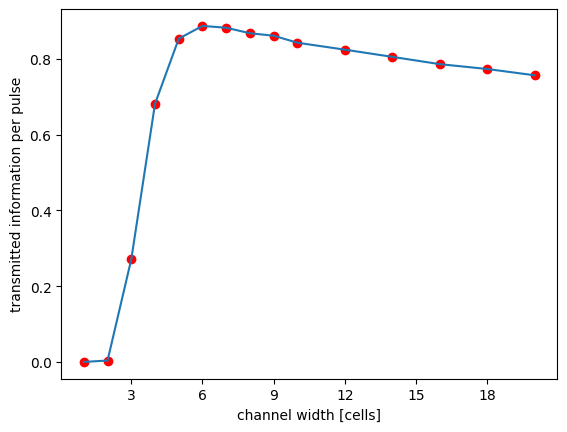

In [7]:
ax = plt.figure().gca()
plt.plot(df['channel_width'], df['MI'])
plt.scatter(df['channel_width'], df['MI'], c='red')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('channel width [cells]')
plt.ylabel('transmitted information per pulse')
# plt.savefig('MI.png')